# Dual Linear Regression
---
Dual linear regression reduces the number of parameters that need to be estimated in a discriminative linear model. If our data is high-dimensional, it may be very expensive to train a simple linear model: all elements of a long gradient vector will need to be estimated.

By instead modelling response variation in a subspace described by the training examples, $\phi = X\varphi$, it's possible to avoid having to estimate parameter values in directions in which the response varies very little. This is good! It means that it is only necessary to model the response in the subspace in which the inputs have actually been seen to vary.

So the form of the regression model is:
$$
    \text{Pr}(w_i \ | \ x_i, \theta) = \text{Norm}_{w_i}[\varphi^T X^T x_i, \sigma^2]\\[0.6em]
$$
Or, if we concatenate the samples column-wise:
$$
        \text{Pr}(w \ | \ X, \theta) = \text{Norm}_{w}[X^T X\varphi, \sigma^2 I]\\[0.6em]
$$
Where $w$ is a vector of responses, $X$ the associated inputs, $\varphi$ the combination of examples pointing in the gradient's direction, and $\sigma^2$ is the common variance of the response.

The maximum likelihood solutions for $\varphi$ and $\sigma^2$ are:
$$
    \hat{\varphi} = (X^T X)^{-1}w\\[0.6em]
    \hat{\sigma}^2 = \frac{(w - X^TX\varphi)^T(w - X^TX\varphi)}{I}
$$
Since the number of parameters being fit in $\varphi$ is equal to the number of datapoints, for $D > I$ it will be possible to fit the model directly to all observations, implying that $X^TX\varphi = w \implies \hat{\sigma}^2 = 0$.

In [1]:
# Read in the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(12)

iris_data = pd.read_csv('.\\data\\iris-species\\Iris.csv')
iris_data = iris_data[iris_data['Species'] == 'Iris-virginica']
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


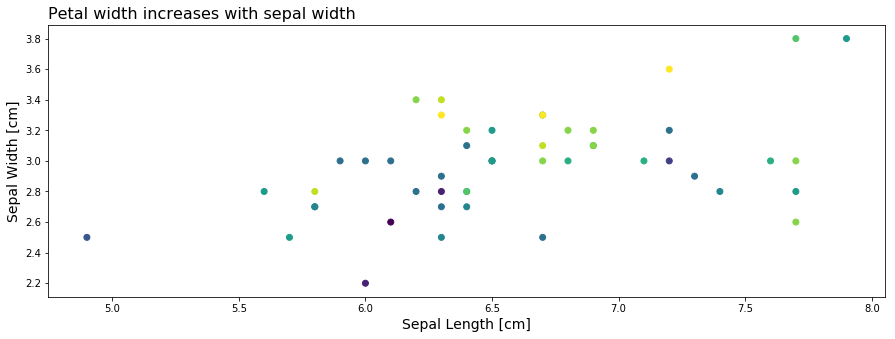

In [2]:
plt.figure(figsize = (15, 5))
plt.scatter(iris_data["SepalLengthCm"], iris_data["SepalWidthCm"], c = iris_data['PetalWidthCm']);
plt.title(s = 'Petal width increases with sepal width', loc = 'left', fontsize = 16, fontweight = 'regular');
plt.xlabel('Sepal Length [cm]', fontsize = 14); plt.ylabel('Sepal Width [cm]', fontsize = 14);

In [3]:
# Create a dataset in which the number of dimensions exceeds the number of observations
iris_data = iris_data.sample(frac = 1).reset_index() # Shuffle data's rows
X         = np.mat(iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']].values).T # Columns are samples, rows are features
X_train   = np.mat(X[:, [0, 1]])
X_test    = X[:, 2:-1]
w         = np.mat(iris_data['PetalWidthCm']).T
w_train   = np.mat(iris_data['PetalWidthCm'].values[[0, 1]]).T
w_test    = iris_data['PetalWidthCm'].drop([0, 1], axis = 0).values
n_train_samples = len(w_train)

In [4]:
# Compute the maximum likelihood estimates for the dual vector
varphi   = np.linalg.inv(X_train.T * X_train) * w_train
phi      = X_train * varphi
sigma_sq = (w_train - (X_train.T * phi)).T * (w_train - (X_train.T * phi)) / n_train_samples
phi_true = np.linalg.inv(X * X.T) * X * w

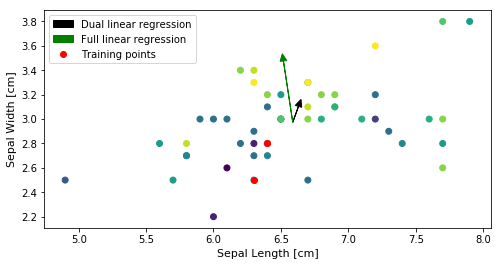

In [6]:
# Plot the direction of the gradient produced by the dual vector
plt.figure(figsize = (8, 4))
plt.scatter(iris_data["SepalLengthCm"], iris_data["SepalWidthCm"], c = iris_data['PetalWidthCm']);
plt.xlabel('Sepal Length [cm]', fontsize = 11); plt.ylabel('Sepal Width [cm]', fontsize = 11);

# Get the subplot that we are currently working on
ax = plt.gca()
train_smp = plt.plot(X_train[0, :].T, X_train[1,:].T, 'ro', label = 'Training points')
phi_arr = ax.arrow(np.mean(X[0, :]), np.mean(X[1, :]), np.asscalar(phi[0]), np.asscalar(phi[1]),
             head_width=0.05, head_length=0.06, fc='k', ec='k', label = 'Dual linear regression');
phi_true_arr = ax.arrow(np.mean(X[0, :]), np.mean(X[1, :]), np.asscalar(phi_true[0]), np.asscalar(phi_true[1]),
                 head_width=0.05, head_length=0.06, fc='g', ec='g', label = 'Full linear regression');
plt.legend(handles=[phi_arr, phi_true_arr, train_smp[0]]);
plt.savefig('dual_linear_regression.pdf', pointsize = 400)